In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_auc_score,confusion_matrix

In [3]:
pd.set_option('display.max_columns',40)
forest_data = pd.read_csv('forestfires.csv')
forest_data.head(20)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
5,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
7,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small
8,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,small
9,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,small


### Data Understanding and preperation

In [4]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
for col in forest_data.columns:
    print(forest_data[col].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
86.8     1
94.4     1
18.7     1
88.3     1
86.3     1
Name: FFMC, Length: 106, dtype: int64
99.0     10
129.5     9
142.4     8
231.1     8
108.4     7
         ..
2.4       1
24.9      1
97.9      1
164.1     1
103.8     1
Name: DMC, Length: 215, dtype: int64
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
92.4      1
171.4     1
18.7      1
354.6     1
629.1     1
Name: DC, Length: 219, dtype: int64
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
2.3      1
14.4     1
7.9      1
16.3     1
7.3      1
Name: ISI, Length: 119, dtype: int64
19.6    8
17.4    8
20.6    7
15.4    7
23.4    6
       ..
16.9    1
32.6    1
24.0    1
25.0

**The month and day feature is repeated so we have to drop unwanted features**

In [6]:
forest_df = forest_data.copy()

In [7]:
forest_df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
forest_df.drop(labels = ['month', 'day'], axis = 1,inplace=True)

In [9]:
forest_df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [10]:
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [11]:
le = LabelEncoder()
forest_df['size_category'] = le.fit_transform(forest_df['size_category'])
forest_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Model building

In [12]:
X = forest_df.iloc[:,:-1]
y = forest_df.iloc[:,-1:]

In [13]:
forest_df.mean()

FFMC              90.644681
DMC              110.872340
DC               547.940039
ISI                9.021663
temp              18.889168
RH                44.288201
wind               4.017602
rain               0.021663
area              12.847292
dayfri             0.164410
daymon             0.143133
daysat             0.162476
daysun             0.183752
daythu             0.117988
daytue             0.123791
daywed             0.104449
monthapr           0.017408
monthaug           0.355899
monthdec           0.017408
monthfeb           0.038685
monthjan           0.003868
monthjul           0.061896
monthjun           0.032882
monthmar           0.104449
monthmay           0.003868
monthnov           0.001934
monthoct           0.029014
monthsep           0.332689
size_category      0.731141
dtype: float64

In [14]:
std_scale = StandardScaler()
scaled_X = std_scale.fit_transform(X)
scaled_X = pd.DataFrame(data = scaled_X,columns=X.columns)
scaled_X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,-0.443576,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,1.345282,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.172860,-0.706081


In [15]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,random_state=12,test_size=0.15,stratify=y,shuffle=True)
X_train.shape,X_test.shape

((439, 28), (78, 28))

### Model training and testing

Accuracy   :  0.7435897435897436
Precision  :  0.7402597402597403
Recall     :  1.0
AUC        :  0.5238095238095238


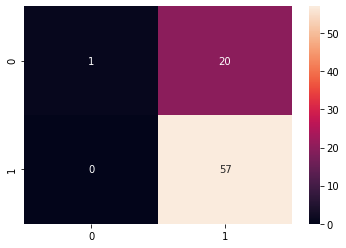

In [16]:
svm_classifier = SVC()
svm_classifier.fit(X_train,y_train)
y_pred_test = svm_classifier.predict(X_test)
print('Accuracy   : ',accuracy_score(y_test,y_pred_test))
print('Precision  : ',precision_score(y_test,y_pred_test))
print('Recall     : ',recall_score(y_test,y_pred_test))
print('AUC        : ',roc_auc_score(y_test,y_pred_test))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf,annot=True)
plt.show()

**TUNE SVM MODEL USING GridSearchCV**

In [17]:
grid_cv = GridSearchCV(estimator=svm_classifier, param_grid={
    'kernel':['poly','linear','rbf'],
    'degree': range(1,10),
    'C':range(1,10)
})
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 10), 'degree': range(1, 10),
                         'kernel': ['poly', 'linear', 'rbf']})

In [18]:
grid_cv.best_params_

{'C': 9, 'degree': 1, 'kernel': 'linear'}

In [19]:
grid_cv.best_score_

0.9590125391849529

In [20]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


<AxesSubplot:xlabel='size_category', ylabel='count'>

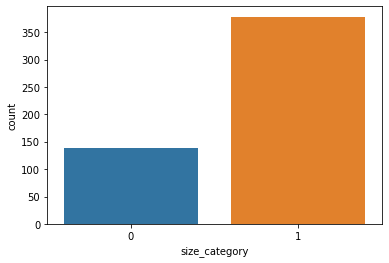

In [21]:
sns.countplot(y['size_category'])

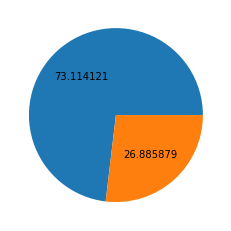

In [22]:
plt.pie(x = y.value_counts(),autopct='%2f')
plt.show()

In [23]:
y.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

**APPLYING PARAMTERS TO THE MODEL**

Accuracy   :  0.97436
Precision  :  1.0
Recall     :  0.96491
AUC        :  0.98246


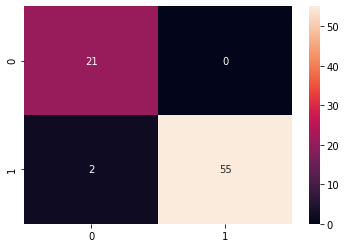

In [30]:
svm_classifier = SVC(C= 9, degree = 1, kernel = 'linear',class_weight={0:3})
svm_classifier.fit(X_train,y_train)
y_pred_test = svm_classifier.predict(X_test)
print('Accuracy   : ',round(accuracy_score(y_test,y_pred_test),5))
print('Precision  : ',round(precision_score(y_test,y_pred_test),5))
print('Recall     : ',round(recall_score(y_test,y_pred_test),5))
print('AUC        : ',round(roc_auc_score(y_test,y_pred_test),5))
conf = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf,annot=True)
plt.show()

#### OBSERVATION

**WE GOT OUR MODEL WITH 97% TESTING ACCURACY**